In [1]:
import json
from model_api import eval_metric_model, yagpt_lite
from post_process import post_process_yagpt_lite
from tqdm import tqdm
import numpy as np
import time
import os
import utils

iam_token = 't1.9euelZqdx5CSm8jMj46ckMqWyYycxu3rnpWaz42dm4uLzouOlsfMypLLyZfl8_cNPw9U-e9-ZE1o_t3z901tDFT5735kTWj-zef1656VmpSaxpKZnM-eiozIkpGXmpXG7_zF656VmpSaxpKZnM-eiozIkpGXmpXG.iWyi4DG6jbihWsXSX-HKMVRtsYn_VlCqkZIuXr1oIAgh21ggc0Zx2sUho6OJqTtWj0AzYRiJHAcqIJPH6sAcAA'

In [2]:
with open('train_data.json', 'r') as fin:
    train_data = [json.loads(s) for s in fin.readlines()]

## Find best summaries

In [3]:
# train_data[0] = {'Text': '«За сотню»: две «вертушки» для винила от Pro-Ject и Technics / Habr              \n\n29-10-2021\nВ прошлый раз мы поговорили о проигрывателях от Yamaha, Denon и TEAC в сегменте «до 60 тысяч рублей», а потом продвинулись дальше с обзором чуть более дорогих систем от Denon и Pro-Ject. Сегодня переходим планку в сто тысяч за вертушку и смотрим, что готовы предложить за эту сумму бренды Pro-Ject и Technics. Проигрыватель Pro-Ject X2 — Audiomania.ru [ 105 000 ] Pro-Ject X2 — это одна из наиболее свежих разработок инженеров этого бренда. Проигрыватель производят в Европе, поэтому в качестве используемых материалов и реализации выбранных ими решений сомневаться не приходится. Шасси выполнено из MDF и имеет внушительную толщину — 50 мм. При общих габаритах системы [460 х 150 х 340 мм] это — серьезный показатель, как и ее существенный вес — 10 кг. Два килограмма из десяти приходятся на 300-мм опорный акриловый диск толщиной 30 мм. Он установлен на скрытый субдиск, опирающийся на подшипник из стали и бронзы со специальными вставками. Опорный диск здесь приводит в движение пассиковый привод, а для двигателя производитель использует специальную систему стабилизиации и электронного управления скоростью вращения SpeedBox. Она поддерживает три скорости [33 / 45 / 78 об/мин]. Из недостатков — у Pro-Ject X2 нет автостопа, однако наши специалисты рекомендуют установить полуавтоматический подъемник Pro-Ject Q UP [ 3 500 ]. Он поднимет тонарм по мере завершения проигрывания пластинки. Тонарм проигрывателя Pro-Ject X2 — Audiomania.ru Тонарм представляет собой 230-мм трубку из алюминия и углепластика. В него интегрирован шелл для установки MM- и MC-звукоснимателей. Кстати, в последнем случае массивный опорный диск и шасси позволяют минимизировать потенциальные детонации. Стоит заметить, что российский вариант комплектации в большинстве случаев поступает на прилавки магазинов без картриджа, поэтому мы рекомендуем присмотреться к головкам от Ortofon , пусть и далеко не всегда бюджетным. Из других нюансов — есть RCA (Phono) и соответсвующий кабель Connect It E. Присутствует акриловая пылезащитная крышка и специальные опоры для шасси с резиновой вставкой. При необходимости они поддаются регулировке, а их нижняя поверхность оклеена фетром. В целом проигрыватель идет в двух вариантах отделки — шпон натурального дерева и многослойный лак. Сравнение с младшей моделью бренда [X1] есть тут . В нем вы найдете не только крупные снимки X2, но и подробный рассказ эксперта Stereo.ru о впечатлениях от прослушивания этой системы. Проигрыватель Technics SL-1200 MK7 — Audiomania.ru [ 119 990 ] Technics SL-1200 MK7 обладает сопоставимыми габаритами [453 x 169 x 353 мм] и весом [9,6 кг], плюс — включает несколько доработанных решений, использованных в других вертушках бренда. Например, двигатель с высоким пусковым моментом. Он предоставляет возможность плавной регулировки скорости, «подтормаживания» в ручном режиме и вращения в обе стороны. Привод — прямой, есть питч-контроль и электронная регулировка скорости [33 / 45 / 78 об/мин]. 332-мм опорный диск [1,8 кг] выполнен из алюминия, как и шасси проигрывателя. Верхняя плоскость диска обеспечена резиновым покрытием, которое служит в роли мата. Тонарм для этой модели инженеры выбрали классический. Это — 230-мм статически сбалансированная s-образная трубка. В силу гораздо большего профессионального уклона — по сравнению с Pro-Ject X2 — он «заточен» для стабильной работы в весьма специфических условиях. Из других нюансов — у вертушки есть система подсветка Target Light и возможность переключать цвет подсветки стробоскопа и органов управления. Опоры проигрывателя можно регулировать. Обзоры других проигрывателей винила в нашем хабраблоге: 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 . Дополнительное чтение по теме у нас в «Мире Hi-Fi»: «Между винилом и кассетой»: история тефифона «Камера, мотор, музыка!»: как режиссеры используют винил в кино От левитирующих пластинок до звука из коробки — 6 гаджетов для винила От игр до тайных сообщений: обсуждаем «пасхалки» в виниловых релизах Почему вернулся винил, и как с этим связаны стриминговые сервисы Винил вместо почтовой марки: необычный раритет Как развивалось домашнее аудио: эра винила\n',
#  'metric': 0.4780273438,
#  'metric_input': 'Текст статьи:\n«За сотню»: две «вертушки» для винила от Pro-Ject и Technics / Habr              \n\n29-10-2021\nВ прошлый раз мы поговорили о проигрывателях от Yamaha, Denon и TEAC в сегменте «до 60 тысяч рублей», а потом продвинулись дальше с обзором чуть более дорогих систем от Denon и Pro-Ject. Сегодня переходим планку в сто тысяч за вертушку и смотрим, что готовы предложить за эту сумму бренды Pro-Ject и Technics. Проигрыватель Pro-Ject X2 — Audiomania.ru [ 105 000 ] Pro-Ject X2 — это одна из наиболее свежих разработок инженеров этого бренда. Проигрыватель производят в Европе, поэтому в качестве используемых материалов и реализации выбранных ими решений сомневаться не приходится. Шасси выполнено из MDF и имеет внушительную толщину — 50 мм. При общих габаритах системы [460 х 150 х 340 мм] это — серьезный показатель, как и ее существенный вес — 10 кг. Два килограмма из десяти приходятся на 300-мм опорный акриловый диск толщиной 30 мм. Он установлен на скрытый субдиск, опирающийся на подшипник из стали и бронзы со специальными вставками. Опорный диск здесь приводит в движение пассиковый привод, а для двигателя производитель использует специальную систему стабилизиации и электронного управления скоростью вращения SpeedBox. Она поддерживает три скорости [33 / 45 / 78 об/мин]. Из недостатков — у Pro-Ject X2 нет автостопа, однако наши специалисты рекомендуют установить полуавтоматический подъемник Pro-Ject Q UP [ 3 500 ]. Он поднимет тонарм по мере завершения проигрывания пластинки. Тонарм проигрывателя Pro-Ject X2 — Audiomania.ru Тонарм представляет собой 230-мм трубку из алюминия и углепластика. В него интегрирован шелл для установки MM- и MC-звукоснимателей. Кстати, в последнем случае массивный опорный диск и шасси позволяют минимизировать потенциальные детонации. Стоит заметить, что российский вариант комплектации в большинстве случаев поступает на прилавки магазинов без картриджа, поэтому мы рекомендуем присмотреться к головкам от Ortofon , пусть и далеко не всегда бюджетным. Из других нюансов — есть RCA (Phono) и соответсвующий кабель Connect It E. Присутствует акриловая пылезащитная крышка и специальные опоры для шасси с резиновой вставкой. При необходимости они поддаются регулировке, а их нижняя поверхность оклеена фетром. В целом проигрыватель идет в двух вариантах отделки — шпон натурального дерева и многослойный лак. Сравнение с младшей моделью бренда [X1] есть тут . В нем вы найдете не только крупные снимки X2, но и подробный рассказ эксперта Stereo.ru о впечатлениях от прослушивания этой системы. Проигрыватель Technics SL-1200 MK7 — Audiomania.ru [ 119 990 ] Technics SL-1200 MK7 обладает сопоставимыми габаритами [453 x 169 x 353 мм] и весом [9,6 кг], плюс — включает несколько доработанных решений, использованных в других вертушках бренда. Например, двигатель с высоким пусковым моментом. Он предоставляет возможность плавной регулировки скорости, «подтормаживания» в ручном режиме и вращения в обе стороны. Привод — прямой, есть питч-контроль и электронная регулировка скорости [33 / 45 / 78 об/мин]. 332-мм опорный диск [1,8 кг] выполнен из алюминия, как и шасси проигрывателя. Верхняя плоскость диска обеспечена резиновым покрытием, которое служит в роли мата. Тонарм для этой модели инженеры выбрали классический. Это — 230-мм статически сбалансированная s-образная трубка. В силу гораздо большего профессионального уклона — по сравнению с Pro-Ject X2 — он «заточен» для стабильной работы в весьма специфических условиях. Из других нюансов — у вертушки есть система подсветка Target Light и возможность переключать цвет подсветки стробоскопа и органов управления. Опоры проигрывателя можно регулировать. Обзоры других проигрывателей винила в нашем хабраблоге: 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 . Дополнительное чтение по теме у нас в «Мире Hi-Fi»: «Между винилом и кассетой»: история тефифона «Камера, мотор, музыка!»: как режиссеры используют винил в кино От левитирующих пластинок до звука из коробки — 6 гаджетов для винила От игр до тайных сообщений: обсуждаем «пасхалки» в виниловых релизах Почему вернулся винил, и как с этим связаны стриминговые сервисы Винил вместо почтовой марки: необычный раритет Как развивалось домашнее аудио: эра винила\n\n\nКраткое содержание:\nВ статье рассматриваются два проигрывателя винила от Pro-Ject и Technics, которые стоят дороже 100 тысяч рублей. Pro-Ject X2 имеет массивное шасси и акриловый опорный диск, а его тонарм интегрирован с шеллом для установки звукоснимателей. Technics SL-1200 MK7 имеет прямой привод и регулируемую скорость вращения.',
#  'summary': 'В статье рассматриваются два проигрывателя винила от Pro-Ject и Technics, которые стоят дороже 100 тысяч рублей. Pro-Ject X2 имеет массивное шасси и акриловый опорный диск, а его тонарм интегрирован с шеллом для установки звукоснимателей. Technics SL-1200 MK7 имеет прямой привод и регулируемую скорость вращения.'}

# get best 10% of the train data by metric
train_data_best = sorted(train_data, key=lambda x: x['metric'], reverse=True)
train_data_best = train_data_best[:int(len(train_data_best) * 0.3)]
len(train_data_best), train_data_best[-1]

(3330,
 {'Text': "О том, как из C# я перешел в Elixir/Phoenix / Хабр                                                 \n\n11-01-2019\nКак-то раз пришлось мне менять работу. До этого я работал только с языками типа Python, C++, C# и ещё парочкой подобных. А теперь пришлось начать работать с функциональным языком. Первые впечатления были «да что за фигня?». Однако у меня получилось достаточно быстро адаптироваться. Далее я расскажу об основных моментах, к которым пришлось привыкнуть или которые пришлось понять, чтобы начать писать быстро и адекватно. 1. Pattern matching Это одна из основных фишек языка. Но полностью осознать её, пока не начнешь реально писать на языке немного сложно. Первое что я прочел сопоставление паттернов — это то что благодаря этой штуке можно достаточно просто извлекать данные из структур и связывать их с переменными. Но на самом деле все несколько сложнее. Сопоставление паттернов работает почти везде в данном языке. Приведу три примера иллюстрирующих основные прим

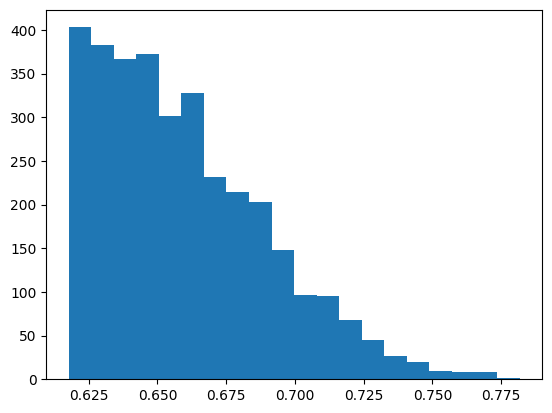

In [4]:
# plot hist of metrics
import matplotlib.pyplot as plt
plt.hist([x['metric'] for x in train_data_best], bins=20)
plt.show()


In [16]:
from model_api import eval_metric_model, yagpt_lite, yagpt_summarization
from post_process import post_process_yagpt_summarization

idx = -1
s = yagpt_summarization(train_data_best[idx]['Text'], iam_token, 0.1)
s = post_process_yagpt_summarization(s)

eval_score = eval_metric_model(train_data_best[idx]['Text'], s)
eval_score

0.622559

In [17]:
train_data_best[idx]['metric']

0.6176757813

In [5]:
# make train data json
train_data_json = []
for x in tqdm(train_data_best):
    train_data_json.append({'request': x['Text'], 'response': x['summary']})

100%|██████████| 3330/3330 [00:00<00:00, 1315163.12it/s]


In [6]:
# filter out too long texts
max_request_len = 4000
max_response_len = 2000
train_data_json_filtered = [x for x in train_data_json if len(x['request']) < max_request_len and len(x['response']) < max_response_len]
len(train_data_json_filtered)

18

In [21]:
# shuffle train data with seed
import random
random.seed(42)
random.shuffle(train_data_json_filtered)


In [7]:
# save train data json
import json
json.dump(train_data_json_filtered, open('train_data_best_filtered.json', 'w'), ensure_ascii=False)
train_data_json_filtered[0]

{'request': 'Кластеризация беспроводных точек доступа с использованием метода k-средних / Habr                        \n\n28-02-2019\nВизуализация и анализ данных в настоящее время широко применяется в телекоммуникационной отрасли. В частности, анализ в значительной степени зависит от использования геопространственных данных. Возможно, это связано с тем, что телекоммуникационные сети сами по себе географически разбросаны. Соответственно, анализ таких дисперсий может дать огромную ценность. Данные Чтобы проиллюстрировать алгоритм кластеризации k-средних мы воспользуемся базой географических данных для бесплатного общественного WiFi в Нью-Йорке. Набор данных доступен в NYC Open Data. В частности, алгоритм кластеризации k-средних используется для формирования кластеров использования WiFi на основе данных широты и долготы. Из самого набора данных данные о широте и долготе извлекаются с использованием языка программирования R: #1. Prepare data newyork<-read.csv("NYC_Free_Public_WiFi_0329201